import libraries


In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras

loading dataset

In [7]:
(X_train,y_train), (X_test,y_test)= keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
X_test


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
X_test[0].shape

(28, 28)

In [ ]:
class_label= ["T-shirt/top",'Trouser/pants','Pullover shirt','Dress','Coat', 'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
class_label

['T-shirt/top',
 'Trouser/pants',
 'Pullover shirt',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

show image

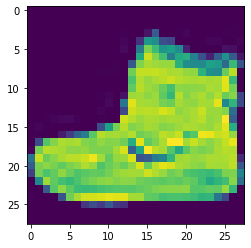

In [ ]:
plt.imshow(X_train[0])

In [ ]:
y_test[0]

9

In [ ]:
y_train[500]

3

In [ ]:
class_label[9]

'Ankle boot'

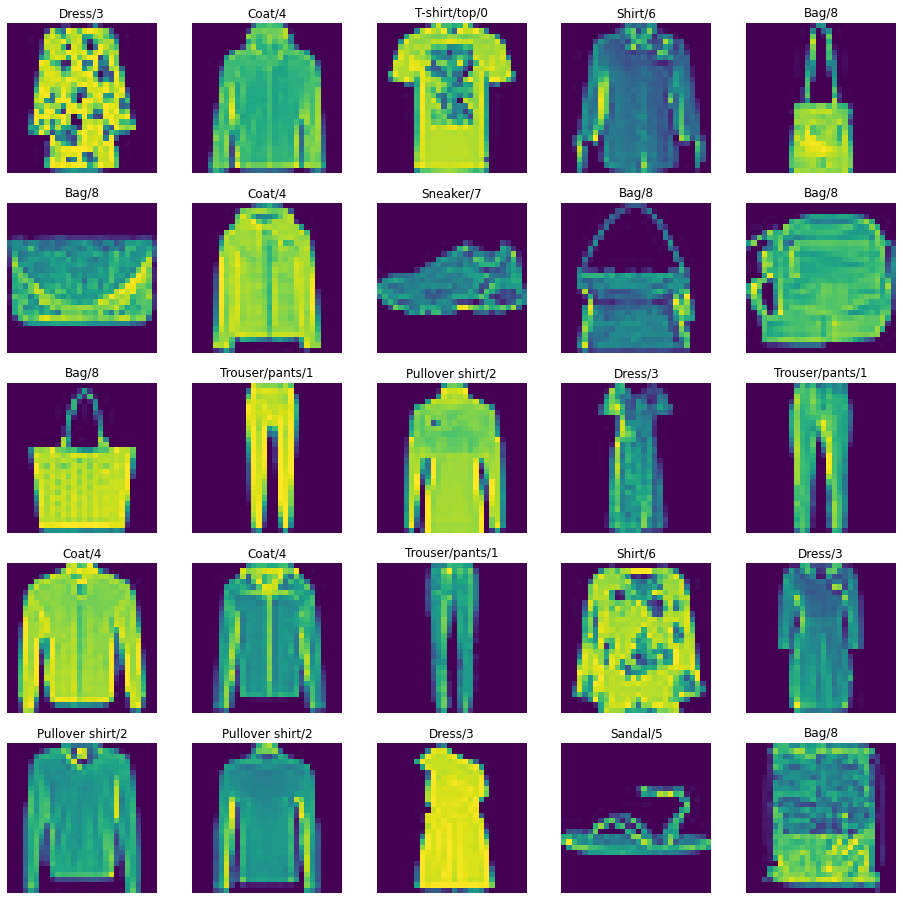

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,10000,25):
  plt.subplot(5,5,j)
  j=j+1
  plt.imshow(X_train[i])
  plt.axis('off')
  plt.title('{}/{}'.format(class_label[y_train[i]],y_train[i]))

change dimension


In [8]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [ ]:
X_train.ndim

4

In [ ]:
X_train.shape

(60000, 28, 28, 1)

features scling

In [ ]:
X_train=X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

## split dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train, test_size=0.2 , random_state=2020)

cnn model building

In [ ]:
model =keras.models.Sequential([
                         
                         keras.layers.Conv2D( filters=32,kernel_size=3,strides=(1,1),padding='valid', activation = 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_val,y_val))

Epoch 1/10
94/94 [==============================] - 31s 22ms/step - loss: 0.9552 - accuracy: 0.6879 - val_loss: 0.4281 - val_accuracy: 0.8467
Epoch 2/10
94/94 [==============================] - 1s 16ms/step - loss: 0.3809 - accuracy: 0.8660 - val_loss: 0.3646 - val_accuracy: 0.8712
Epoch 3/10
94/94 [==============================] - 1s 16ms/step - loss: 0.3402 - accuracy: 0.8815 - val_loss: 0.3209 - val_accuracy: 0.8888
Epoch 4/10
94/94 [==============================] - 1s 16ms/step - loss: 0.2998 - accuracy: 0.8950 - val_loss: 0.3125 - val_accuracy: 0.8899
Epoch 5/10
94/94 [==============================] - 1s 16ms/step - loss: 0.2781 - accuracy: 0.9010 - val_loss: 0.3015 - val_accuracy: 0.8923
Epoch 6/10
94/94 [==============================] - 1s 16ms/step - loss: 0.2606 - accuracy: 0.9056 - val_loss: 0.3007 - val_accuracy: 0.8932
Epoch 7/10
94/94 [==============================] - 1s 16ms/step - loss: 0.2425 - accuracy: 0.9116 - val_loss: 0.2849 - val_accuracy: 0.9013
Epoch 8/10
9

## model testing

In [ ]:
model.predict(np.expand_dims(X_test[0],axis=0)).round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97]],
      dtype=float32)

In [ ]:
np.argmax(model.predict(np.expand_dims(X_test[0],axis=0)).round(2))

9

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
y_pred = model.predict(X_test).round(2)

In [ ]:
y_pred

array([[0.  , 0.  , 0.  , ..., 0.03, 0.  , 0.97],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.49, 0.05, 0.01]], dtype=float32)

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2796 - accuracy: 0.8981


[0.27957749366760254, 0.8981000185012817]

visualize output


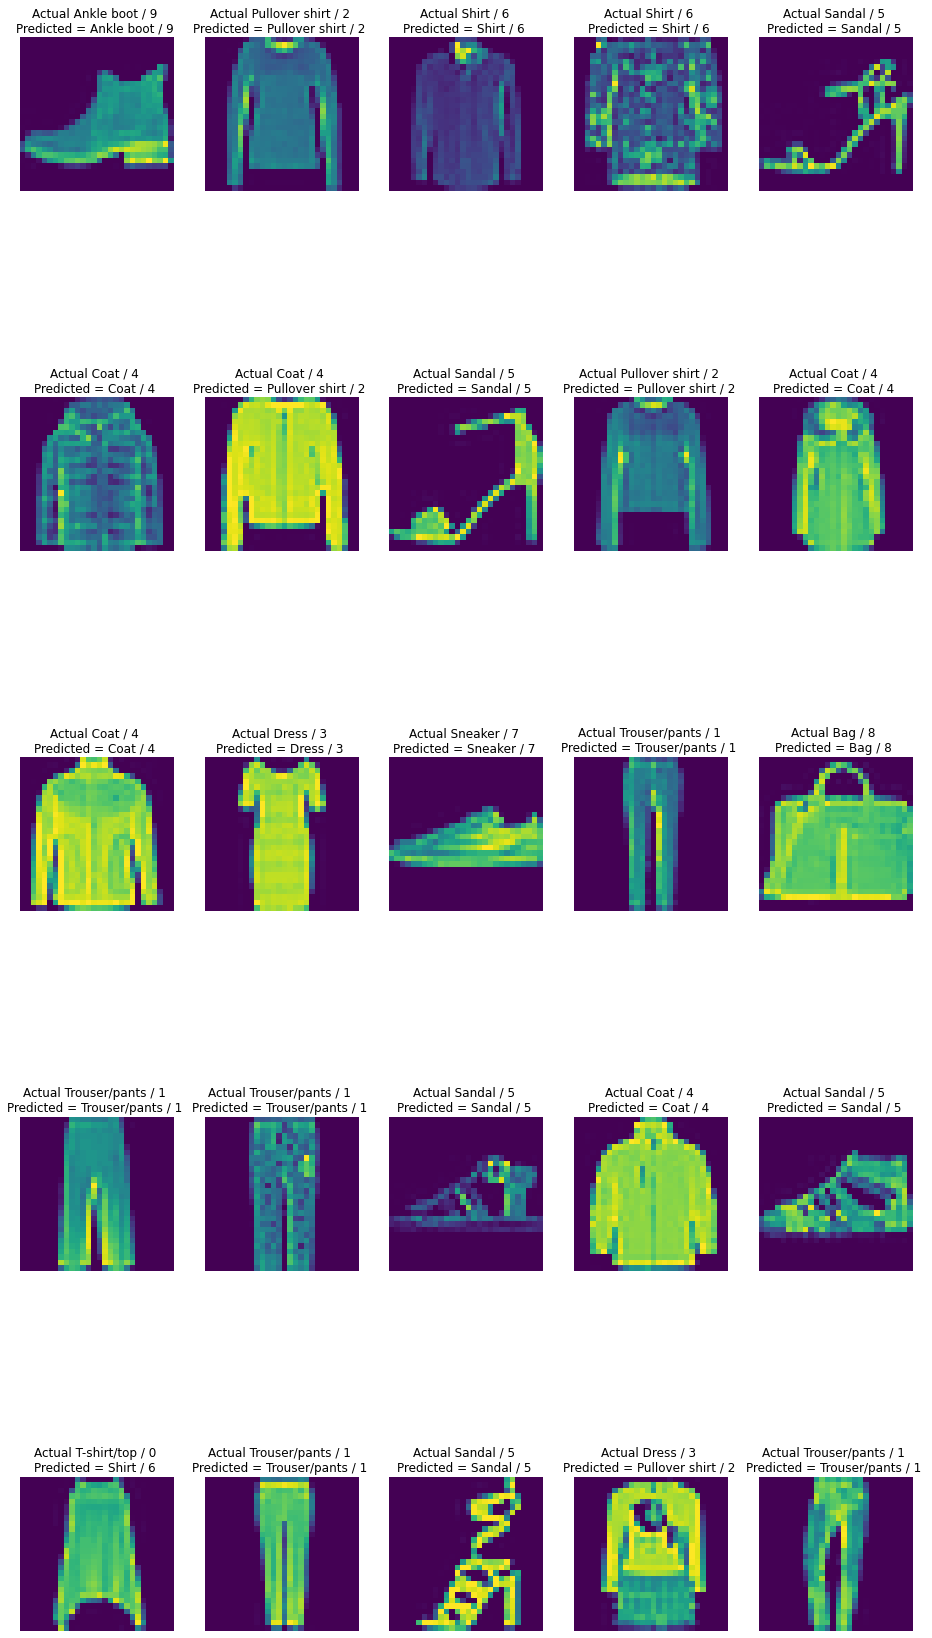

In [ ]:
plt.figure(figsize=(16,32))

j=1


for i in np.random.randint(0,10000,25):
  plt.subplot(5,5,j)
  j=j+1
  plt.imshow(X_test[i].reshape(28,28))
  plt.axis('off')
  plt.title('Actual {} / {} \nPredicted = {} / {} '.format(class_label[y_test[i]],y_test[i], class_label[np.argmax(y_pred[i])]  ,np.argmax(y_pred[i])))

confusion matrix

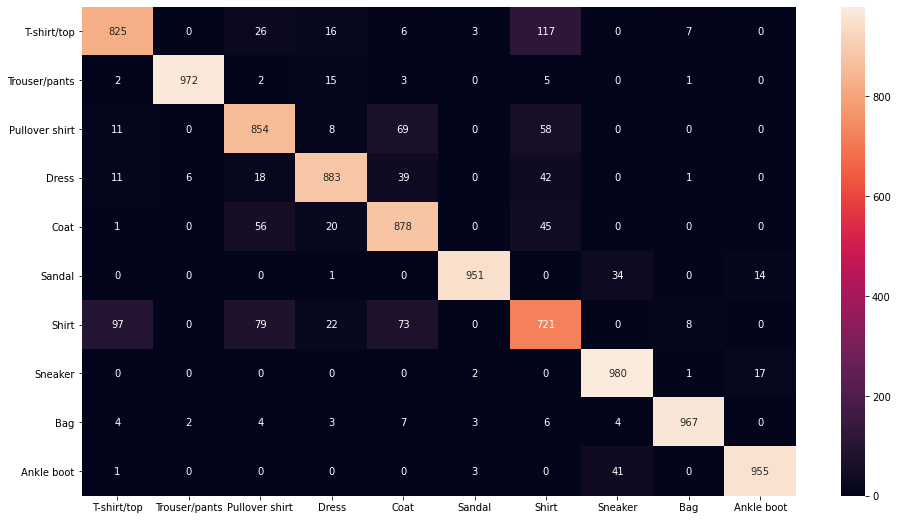

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test,y_pred_labels)

#show cm
sns.heatmap(cm,annot=True, fmt='d',xticklabels=class_label, yticklabels=class_label)

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred_labels,target_names=class_label)

In [ ]:
print(cr)

                precision    recall  f1-score   support

   T-shirt/top       0.87      0.82      0.85      1000
 Trouser/pants       0.99      0.97      0.98      1000
Pullover shirt       0.82      0.85      0.84      1000
         Dress       0.91      0.88      0.90      1000
          Coat       0.82      0.88      0.85      1000
        Sandal       0.99      0.95      0.97      1000
         Shirt       0.73      0.72      0.72      1000
       Sneaker       0.93      0.98      0.95      1000
           Bag       0.98      0.97      0.97      1000
    Ankle boot       0.97      0.95      0.96      1000

      accuracy                           0.90     10000
     macro avg       0.90      0.90      0.90     10000
  weighted avg       0.90      0.90      0.90     10000



## save model for deployment

In [ ]:
model.save('fashion_classification_cnn.h5')

In [ ]:
path= '/content/drive/MyDrive/Colab Notebooks/fashion_classification_cnn2.h5'

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/fashion_classification_cnn2.h5')

In [5]:
model_deploy=keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/fashion_classification_cnn2.h5')

In [9]:
  model_deploy.predict(X_test).round(2)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
model_deploy.predict(np.expand_dims(X_test[0],axis=0 )).round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [12]:
np.argmax(model_deploy.predict(np.expand_dims(X_test[0],axis=0 )).round(2))

9